# Mínimos Cuadrados

**Objetivo**.



# Introducción.

El **método de mínimos cuadrados** se utiliza para ajustar rectas a series de datos presentados en la forma $(x, y)$ como en la siguiente tabla:

| $x_0$ | $x_1$ | $x_2$ | $\dots$ | $x_N$ |
|-----|-----|-----|---------|-----|
| $y_0$ | $y_1$ | $y_2$ | $\dots$ | $y_N$ |

Este tipo de datos pueden provenir de diferentes fuentes como estudios geofísicos en campo, estudios experimentales en laboratorio, obtención de datos mediante encuestas, observación de fenómenos naturales, etc. La idea es estudiar como una variable depende de la otra.

Una posibilidad es que la variación sea lineal es decir: $y = m x + b$.

Sin embargo, en la mayoría de los casos no es posible obtener una recta exacta que pase por todos los puntos.

Para ello, el método de mínimos cuadrados nos proporciona con una metodología para obtener la mejor recta que represente a todos los puntos del conjunto de datos. 

# Conjuntos de datos.

Para esta actividad vamos a generar de manera sintética 4 conjuntos de datos. Usaremos la función `np.random.rand()` de numpy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Total de datos de cada conjunto
N = 20

# Conjunto 0
x0 = np.linspace(0,10,N) 
y0 = x0 + np.random.randn(N)*2

# Conjunto 1
x1 = np.random.randn(len(x0))*10
y1 = np.random.randn(len(x0))*10

# Conjunto 2
x2 = np.arange(0,N)*100
y2 = -x2 + np.random.randn(N)*500

# Conjunto 3
x3 = np.array([i for i in range(N)])
y3 = np.random.rand(N)*0.5-0.5

In [3]:
print('\nArreglo x0 :\n{}'.format(x0))
print('Arreglo y0 :\n{}'.format(y0))

print('\nArreglo x1 :\n{}'.format(x1))
print('Arreglo y1 :\n{}'.format(y1))

print('\nArreglo x2 :\n{}'.format(x2))
print('Arreglo y2 :\n{}'.format(y2))

print('\nArreglo x3 :\n{}'.format(x3))
print('Arreglo y3 :\n{}'.format(y3))


Arreglo x0 :
[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
Arreglo y0 :
[1.78434351 0.32463438 1.74706334 0.78117088 6.86342397 2.44694236
 0.68566534 5.48073782 1.69783868 2.76689212 6.27675707 3.7445952
 6.14844614 7.03286098 6.06212157 6.74190863 9.60235936 4.80689661
 7.08698142 6.60231927]

Arreglo x1 :
[ -1.54965689  -5.8255184   10.63859873   1.52472367  -8.50681348
  -7.40580936  -8.96985276  -4.45531494  -5.33175754   0.05411664
   9.20246974  -2.22642188   9.09690204   2.3910119   -6.03220437
   7.03352834  -1.31026371  15.28326371 -15.72027272  -0.83456219]
Arreglo y1 :
[ -4.1999988  -21.88993586  -9.96237255   2.07117219  -6.58498098
 -15.49527836   3.48495757   9.94828426 -10.12371578  10.80966929
  -0.24182452   1.99759996   6.73702107  -2.63420457   0.74072884
  -8.26711855 

# Análisis exploratorio.

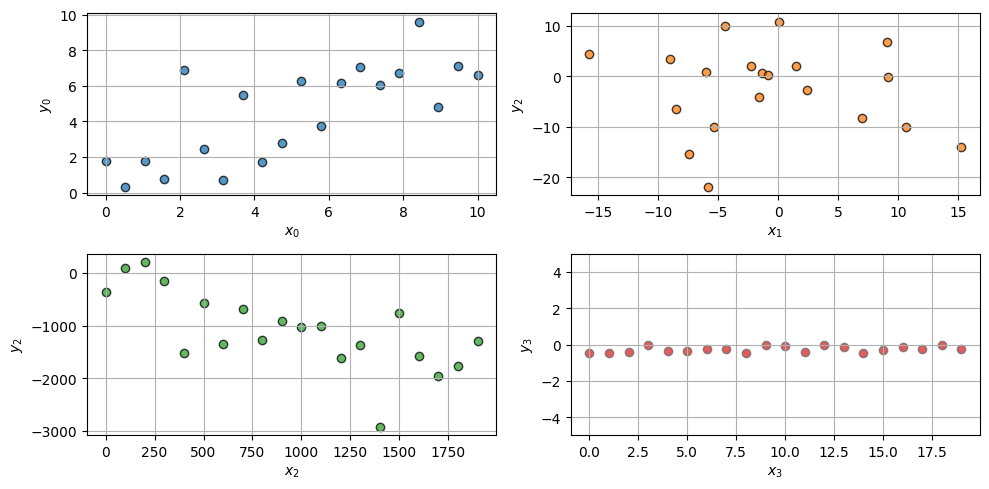

In [4]:
plt.figure(figsize=(10,5))

ax0 = plt.subplot(221)
ax0.scatter(x0, y0, fc = 'C0', ec='k', alpha=0.75)
ax0.set_xlabel('$x_0$')
ax0.set_ylabel('$y_0$')
ax0.grid()

ax1 = plt.subplot(222)
ax1.scatter(x1, y1, fc = 'C1', ec='k', alpha=0.75)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$y_2$')
ax1.grid()

ax2 = plt.subplot(223)
ax2.scatter(x2, y2, fc = 'C2', ec='k', alpha=0.75)
ax2.set_xlabel('$x_2$')
ax2.set_ylabel('$y_2$')
ax2.grid()

ax3 = plt.subplot(224)
ax3.scatter(x3, y3, fc = 'C3', ec='dimgrey', alpha=0.75)
ax3.set_xlabel('$x_3$')
ax3.set_ylabel('$y_3$')
ax3.set_ylim(-5,5)
ax3.grid()

plt.tight_layout()
plt.show()

# Valores de $m$ y $b$ óptimos.

Los valores de la pendiente y de la ordenada al origen de la recta que mejor aproxima a un conjunto de datos están dados por las siguientes fórmulas:

$$
m = \dfrac{\sum_{i=1}^{N} x_i(y_i - \bar{y})}{\sum_{i=1}^{N} x_i(x_i - \bar{x})} \tag{1}
$$

$$
b = \bar{y} - m \bar{x} \tag{2}
$$

donde $\bar{y} = \dfrac{1}{N}\sum_{i=1}^{N} y_i$  y $\bar{x} = \dfrac{1}{N}\sum_{i=1}^{N} x_i$ representan el valor medio de los datos.

Podemos usar los conjuntos de datos definidos antes para calcular $m$ y $b$ y con ello obtener la recta que ajusta los datos. 

<div class="alert alert-success">

## **Ejercicio 1.**

<font color="Black">Calcular la media del conjunto de datos $x_0$, $y_0$. Almacenar las medias en las variables `X` y `Y`.</font>

</div>

In [5]:
### BEGIN SOLUTION
# Media de x
X = 0.0
for xi in x0:
    X += xi
X /= N

# Media de y
Y = 0.0
for yi in y0:
    Y += yi
Y /= N
# END SOLUTION

print('Media de x: {}'.format(X))
print('Media de y: {}'.format(Y))

Media de x: 5.0
Media de y: 4.434197931800894


<div class="alert alert-success">

## **Ejercicio 2.**

<font color="Black">Calcular la pendiente $m$ del conjunto de datos $x_0$, $y_0$ usando la fórmula $(1)$. Almacenar la pendiente en la variable `m`.</font>

</div>

In [6]:
### BEGIN SOLUTION
# Cálculo de m
Sxx = 0
Sxy = 0
for xi, yi in zip(x0, y0):
    Sxy += xi * (yi - Y)
    Sxx += xi * (xi - X)
m = Sxy / Sxx
# END SOLUTION

print('Pendiente m: {}'.format(m))

Pendiente m: 0.6509905397591252


<div class="alert alert-success">

## **Ejercicio 3.**

<font color="Black">Calcular la ordenada al origen $b$ del conjunto de datos $x_0$, $y_0$ usando la fórmula $(2)$. Almacenar la pendiente en la variable `b`.</font>

</div>

In [26]:
# Cálculo de b
# b = ...
### BEGIN SOLUTION
# Cálculo de b
b = Y - m * X
### END SOLUTION

print('Ordenada al origen b: {}'.format(b))

Ordenada al origen b: 1.1792452330052683


<div class="alert alert-success">

## **Ejercicio 4.**

<font color="Black">Construir la recta usando los valores de $m$ y $b$ calculados en los ejercicios anteriores. Almacenar los arreglos de las coordenadas de los puntos de la recta en las variables `xr0` y `yr0`.</font>

</div>

In [25]:
# Construcción de las rectas
# xr0 = np....
# yr0 = ...

### BEGIN SOLUTION
# Construcción de la recta
xr0 = np.linspace(x0.min(), x0.max(), 10)
yr0 = m * xr0 + b
### END SOLUTION

print(xr0)
print(yr0)

[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]
[1.17924523 1.90256805 2.62589088 3.3492137  4.07253652 4.79585934
 5.51918216 6.24250499 6.96582781 7.68915063]


<div class="alert alert-info">

Si realizaste correctamente los ejercicios $1-4$, entonces la siguiente celda de código graficará los cuatro conjuntos de datos y en la primera gráfica se verá la línea recta que construiste.

**NOTA**. En esta graficación estamos usando la biblioteca `macti.visual`.

</div>

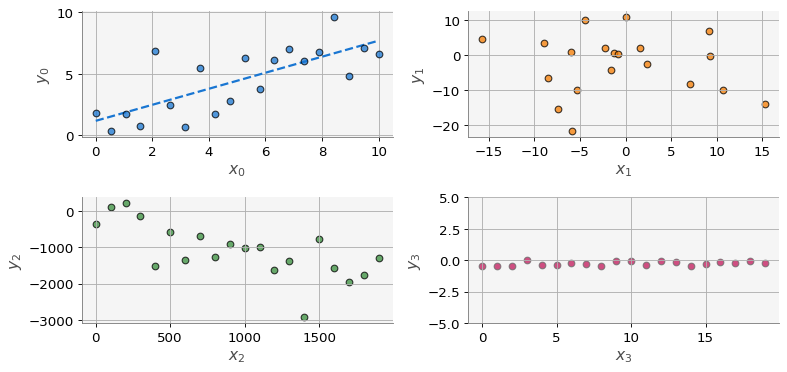

In [9]:
import macti.visual as mvis

axp = [dict(xlabel='$x_0$', ylabel='$y_0$'),
        dict(xlabel='$x_1$', ylabel='$y_1$'),
        dict(xlabel='$x_2$', ylabel='$y_2$'),
        dict(xlabel='$x_3$', ylabel='$y_3$', ylim=(-5,5)),]

vis = mvis.Plotter(2,2,fig_par=dict(figsize=(10,5)), axis_par=axp)

vis.plot(1, xr0, yr0, c='C0', lw=2, ls = '--')
vis.scatter(1, x0, y0, fc='C0', ec='k', alpha=0.75, zorder=5)

vis.scatter(2, x1, y1, fc='C1', ec='k', alpha=0.75)

vis.scatter(3, x2, y2, fc='C2', ec='k', alpha=0.75)

vis.scatter(4, x3, y3, fc='C3', ec='dimgrey', alpha=0.75)

vis.tight_layout()
vis.grid()
vis.show()

<div class="alert alert-success">

## **Ejercicio 5.**

<font color="Black">Construir la función `media(x)` para calcular la media de un conjunto de datos y probarla con los datos $x_0$ y $y_0$. La función recibe como entrada el arreglo con los datos, `x`, y regresa la media de los mismos.</font>

</div>

In [23]:
# Función media()
# def media (x) : 
# ...

### BEGIN SOLUTION
def media(x):
    X = 0.0
    for xi in x:
        X += xi
    return X / N
### END SOLUTION

In [11]:
print(media(x0))
print(media(y0))

5.0
4.434197931800894


<div class="alert alert-success">

## **Ejercicio 6.**

<font color="Black">
    
Construir la función `mincua(x, y)` para calcular $m$ y $b$ de un conjunto de datos. La función recibe como entrada los arreglos de datos, `x, y`, y regresa $m$ y $b$. Calcular $m$ y $b$ para los conjuntos de datos: 

* ($x_1$, $y_1$), almacenar $m$ y $b$ en las variables `m1` y `b1` respectivamente.
* ($x_2$, $y_2$), almacenar $m$ y $b$ en las variables `m2` y `b2` respectivamente.
* ($x_3$, $y_3$), almacenar $m$ y $b$ en las variables `m3` y `b3` respectivamente.

</font>

</div>

In [24]:
# Función mincua()
# def mincua (x) : 
# ...

### BEGIN SOLUTION
def mincua(x, y):
    # Cálculo de la media
    X = media(x)
    Y = media(y)
    
    # Cálculo de m
    Sxx = 0
    Sxy = 0
    for xi, yi in zip(x, y):
        Sxy += xi * (yi - Y)
        Sxx += xi * (xi - X)
    m = Sxy / Sxx

    # Cálculo de b
    b = Y - m * X

    return m, b
### END SOLUTION

In [22]:
# Cálculo de m y b
# m1, b1 = ...
# ...

### BEGIN SOLUTION
m1, b1 = mincua(x1, y1)
m2, b2 = mincua(x2, y2)
m3, b3 = mincua(x3, y3)
### END SOLUTION

print('m1 = {}, \t b1 = {}'.format(m1, b1))
print('m2 = {}, \t b2 = {}'.format(m2, b2))
print('m3 = {}, \t b3 = {}'.format(m3, b3))

m1 = -0.13346110434040107, 	 b1 = -2.704226619616141
m2 = -0.8833468263634389, 	 b2 = -250.8189254875657
m3 = 0.010959419847023378, 	 b3 = -0.36177382507193645


<div class="alert alert-success">

## **Ejercicio 7.**

<font color="Black">
    
Construir las rectas de cada conjunto de datos como sigue:

* Usando `m1` y `b1` construir los arreglos de coordenadas `xr1` y `yr1`.
* Usando `m2` y `b2` construir los arreglos de coordenadas `xr2` y `yr2`.
* Usando `m3` y `b3` construir los arreglos de coordenadas `xr3` y `yr3`.

</font>

</div>

In [14]:
# Construcción de las rectas
# xr1 = np.linspace( ... )
# yr1 = ...
# ...
### BEGIN SOLUTION
# Construcción de las rectas
xr1 = np.linspace(x1.min(), x1.max(), 10)
yr1 = m1 * xr1 + b1

xr2 = np.linspace(x2.min(), x2.max(), 10)
yr2 = m2 * xr2 + b2

xr3 = np.linspace(x3.min(), x3.max(), 10)
yr3 = m3 * xr3 + b3
### END SOLUTION

In [15]:
print(xr1, yr1, sep = '\n', end='\n\n')
print(xr2, yr2, sep = '\n', end='\n\n')
print(xr3, yr3, sep = '\n', end='\n\n')

[-15.72027272 -12.27543534  -8.83059796  -5.38576058  -1.9409232
   1.50391419   4.94875157   8.39358895  11.83842633  15.28326371]
[-0.60618166 -1.06593346 -1.52568526 -1.98543707 -2.44518887 -2.90494067
 -3.36469247 -3.82444427 -4.28419607 -4.74394787]

[   0.          211.11111111  422.22222222  633.33333333  844.44444444
 1055.55555556 1266.66666667 1477.77777778 1688.88888889 1900.        ]
[ -250.81892549  -437.3032555   -623.78758551  -810.27191552
  -996.75624553 -1183.24057554 -1369.72490555 -1556.20923556
 -1742.69356557 -1929.17789558]

[ 0.          2.11111111  4.22222222  6.33333333  8.44444444 10.55555556
 12.66666667 14.77777778 16.88888889 19.        ]
[-0.36177383 -0.33863727 -0.31550072 -0.29236417 -0.26922761 -0.24609106
 -0.22295451 -0.19981795 -0.1766814  -0.15354485]



<div class="alert alert-info">

Si caculaste todo correctamente, entonces la siguiente celda de código graficará los cuatro conjuntos de datos junto con las líneas rectas que construiste.

</div>

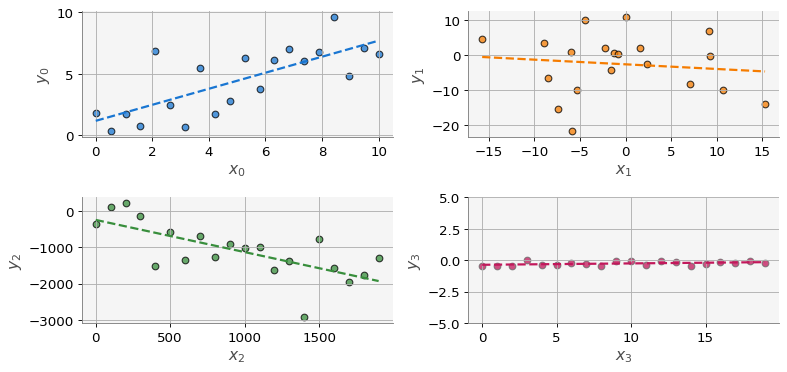

In [21]:
axp = [dict(xlabel='$x_0$', ylabel='$y_0$'),
        dict(xlabel='$x_1$', ylabel='$y_1$'),
        dict(xlabel='$x_2$', ylabel='$y_2$'),
        dict(xlabel='$x_3$', ylabel='$y_3$', ylim=(-5,5)),]

vis = mvis.Plotter(2,2,fig_par=dict(figsize=(10,5)), axis_par=axp)

vis.plot(1, xr0, yr0, c='C0', lw=2, ls = '--')
vis.scatter(1, x0, y0, fc='C0', ec='k', alpha=0.75)

vis.plot(2, xr1, yr1, c='C1', lw=2, ls = '--')
vis.scatter(2, x1, y1, fc='C1', ec='k', alpha=0.75)

vis.plot(3, xr2, yr2, c='C2', lw=2, ls = '--')
vis.scatter(3, x2, y2, fc='C2', ec='k', alpha=0.75)

vis.plot(4, xr3, yr3, c='C3', lw=2, ls = '--')
vis.scatter(4, x3, y3, fc='C3', ec='dimgrey', alpha=0.75)

vis.tight_layout()
vis.grid()
vis.show()

# Apéndice A: Deducción del método.

Dado el conjunto de datos:

| $x_0$ | $x_1$ | $x_2$ | $\dots$ | $x_N$ |
|-----|-----|-----|---------|-----|
| $y_0$ | $y_1$ | $y_2$ | $\dots$ | $y_N$ |

lo que en principio desearíamos es que se cumpliera que:

$$y_i = m x_i + b \;\; \text{para} \;\; i = 0, \dots, N $$

que es equivalente a 

$$0 = m x_i + b - y_i\;\; \text{para} \;\; i = 0, \dots, N, \tag{A.1} $$


Pero la ecuación $(A.1)$ no se cumple en general, de tal manera que lo que se pide es que las desviaciones de cada punto con respecto de la recta sean pequeñas. 

En el caso de este método, la desviación se define como la diferencia del valor $y_i$ con respecto de la recta elevada al cuadrado, es decir: $(m x_i + b - y_i)^2$. Y para calcular la desviación global se suman todas las diferencias, por lo que obtenemos:

$$
f(m,b) = \sum_{i=1}^{N} (m x_i + b - y_i)^2
$$

Observa que del lado derecho hemos puesto $f(m,b)$ es decir, una función que depende de la pendiente $m$ y de la ordenada al origen $b$. 

El valor de la función $f$ (la desviación global) depende de $m$ y $b$; entonces para encontrar los valores de $m$ y $b$ más adecuados, debemos minimizar $f$ con respecto a esas variables.

Recordando nuestras clases de cálculo, sabemos que para minimizar una función, debemos calcular su derivada, igualarla a cero y resolver para encontrar los puntos críticos (máximos y mínimos). En este caso, debemos derivar con respecto a $m$ y con respecto a $b$, y luego resolver un sistema de dos ecuaciones. Veamos como:

$$
\begin{eqnarray}
\dfrac{\partial f}{\partial m} & = & \dfrac{\partial}{\partial m} \left(\sum_{i=1}^{N} (m x_i + b - y_i)^2 \right) = 2 \sum_{i=1}^{N} x_i \big(m x_i + b - y_i\big) = 0 \tag{A.2}\\
\dfrac{\partial f}{\partial b} & = & \dfrac{\partial}{\partial b} \left(\sum_{i=1}^{N} (m x_i + b - y_i)^2 \right) = 2\sum_{i=1}^{N} \big(m x_i + b - y_i\big) = 0 \tag{A.3}\\
\end{eqnarray}
$$

De la ecuación $(A.3)$ tenemos que:
$$
m \sum_{i=1}^{N} x_i + \sum_{i=1}^{N} b - \sum_{i=1}^{N} y_i = 0
$$

y despejando $b$ obtenemos:
$$
b = \underbrace{\dfrac{1}{N}\sum_{i=1}^{N} y_i}_{\bar{y}} - m \underbrace{\dfrac{1}{N} \sum_{i=1}^{N} x_i}_{\bar{x}} = \bar{y} - m \bar{x} \tag{A.4}
$$

Ahora sustituimos $(A.4)$ en $(A.2)$ y obtenemos:

$$
\sum_{i=1}^{N} x_i \big(m x_i + \bar{y} - m \bar{x} - y_i\big) = 0
$$

Ahora despejamos $m$:

$$
m = \dfrac{\sum_{i=1}^{N} x_i(y_i - \bar{y})}{\sum_{i=1}^{N} x_i(x_i - \bar{x})} \tag{A.5}
$$

Las ecuaciones $(A.4)$ y $(A.5)$ proporcionan los valores de $m$ y $b$ de un punto crítico de la función $f(m,b)$. Falta demostrar que ese punto crítico es un mínimo. Para ello se deben calcular las derivadas segundas ($\dfrac{\partial}{\partial^2 m}$, $\dfrac{\partial}{\partial^2 b}$, $\dfrac{\partial}{\partial m \partial b}$) y ver que se cumplen los criterios necesarios. Esto se puede consultar en ...